# Deneme alanı

In [1]:
import geopandas
from geodatasets import get_path

In [2]:
gdf_uk = geopandas.read_file("uk_lad.geojson")

In [3]:
gdf_uk

,dataset,end-date,entity,entry-date,name,organisation-entity,prefix,reference,start-date,typology,geometry
0,local-authority-district,,8600000,2023-08-02,Hartlepool,10,statistical-geography,E06000001,,geography,"MULTIPOLYGON (((-1.22470 54.62611, -1.22455 54..."
1,local-authority-district,,8600001,2023-08-02,Middlesbrough,10,statistical-geography,E06000002,,geography,"MULTIPOLYGON (((-1.27720 54.54784, -1.27714 54..."
2,local-authority-district,,8600002,2023-08-02,Redcar and Cleveland,10,statistical-geography,E06000003,,geography,"MULTIPOLYGON (((-1.20098 54.57763, -1.20174 54..."
3,local-authority-district,,8600003,2023-08-02,Stockton-on-Tees,10,statistical-geography,E06000004,,geography,"MULTIPOLYGON (((-1.27211 54.55337, -1.27178 54..."
4,local-authority-district,,8600004,2023-08-02,Darlington,10,statistical-geography,E06000005,,geography,"POLYGON ((-1.63768 54.61714, -1.63800 54.61720..."
...,...,...,...,...,...,...,...,...,...,...,...
339,local-authority-district,,8600720,2021-12-11,Gateshead,10,statistical-geography,E08000020,,geography,"POLYGON ((-1.78497 54.98452, -1.78534 54.98454..."
340,local-authority-district,,8600721,2023-08-02,Cumberland,10,statistical-geography,E06000063,,geography,"MULTIPOLYGON (((-3.25616 54.21552, -3.25610 54..."
341,local-authority-district,,8600722,2023-08-02,Westmorland and Furness,10,statistical-geography,E06000064,,geography,"MULTIPOLYGON (((-3.20111 54.06410, -3.20087 54..."
342,local-authority-district,,8600723,2023-08-02,North Yorkshire,10,statistical-geography,E06000065,,geography,"MULTIPOLYGON (((-1.00674 53.88894, -1.00801 53..."


In [26]:
gdf_uk_locals = gdf_uk[["reference", "geometry"]]

gdf_uk_locals

,reference,geometry
0,E06000001,"MULTIPOLYGON (((-1.22470 54.62611, -1.22455 54..."
1,E06000002,"MULTIPOLYGON (((-1.27720 54.54784, -1.27714 54..."
2,E06000003,"MULTIPOLYGON (((-1.20098 54.57763, -1.20174 54..."
3,E06000004,"MULTIPOLYGON (((-1.27211 54.55337, -1.27178 54..."
4,E06000005,"POLYGON ((-1.63768 54.61714, -1.63800 54.61720..."
...,...,...
339,E08000020,"POLYGON ((-1.78497 54.98452, -1.78534 54.98454..."
340,E06000063,"MULTIPOLYGON (((-3.25616 54.21552, -3.25610 54..."
341,E06000064,"MULTIPOLYGON (((-3.20111 54.06410, -3.20087 54..."
342,E06000065,"MULTIPOLYGON (((-1.00674 53.88894, -1.00801 53..."


<Axes: >

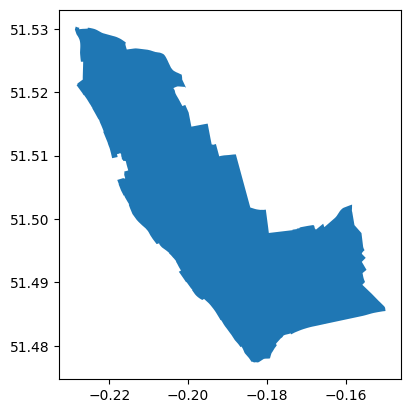

In [4]:
first = gdf_uk[gdf_uk["reference"] == "E09000020"].index

gdf_uk.iloc[first].plot()


In [5]:
gdf_uk.iloc[first]

,dataset,end-date,entity,entry-date,name,organisation-entity,prefix,reference,start-date,typology,geometry
303,local-authority-district,,8600303,2023-08-02,Kensington and Chelsea,10,statistical-geography,E09000020,,geography,"POLYGON ((-0.22756 51.53016, -0.22782 51.53018..."


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [8]:
data = pd.read_csv("clean_data.csv")
df = data[["Accident_Index","Longitude","Latitude","Local_Authority_(Highway)"]]

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

In [9]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

c:\Users\kdrer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Accident_Index,Longitude,Latitude,Local_Authority_(Highway),geometry
0,200501BS00001,-0.191170,51.489096,E09000020,POINT (-0.19117 51.48910)
1,200501BS00002,-0.211708,51.520075,E09000020,POINT (-0.21171 51.52007)
2,200501BS00003,-0.206458,51.525301,E09000020,POINT (-0.20646 51.52530)
3,200501BS00004,-0.173862,51.482442,E09000020,POINT (-0.17386 51.48244)
4,200501BS00005,-0.156618,51.495752,E09000020,POINT (-0.15662 51.49575)


In [10]:
geo = gdf_uk.iloc[first]["geometry"]

type(geo)

geopandas.geoseries.GeoSeries

In [12]:
geometry[675].within(geo)

303    False
Name: geometry, dtype: bool

In [17]:
gdf_uk_locals[gdf_uk_locals["reference"] == "E06000001"]

1469609